<a href="https://colab.research.google.com/github/neddy0318/StudyStatistics/blob/main/18_SurvivalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생존 분석 (Survival Analysis)

## 1. 개요

### 1) 개요 및 정의
- 생존 분석(Survival Analysis)은 시간에 따른 사건의 발생을 분석하는 통계적 방법입니다. 주로 생명공학, 의학, 사회학, 경제학 등에서 사용되며, 사건 발생 시점이 중요한 데이터에 적용됩니다.
- 주요 목적은 사건이 발생할 때까지의 시간을 분석하고, 예측하는 것입니다.

### 2) 절단 자료 (Censored Data)
절단 자료는 관찰 기간 동안 사건이 발생하지 않은 경우를 포함하는 데이터입니다. 이는 데이터가 완전하지 않거나 제한된 정보만을 포함할 때 발생합니다.

- **Censoring**: 관찰 기간 동안 사건 발생 여부를 알 수 없는 경우를 의미합니다.
- **Right Censoring**: 사건이 관찰 기간 이후에 발생한 경우입니다. 예를 들어, 환자가 연구 기간 동안 생존하여 연구 종료 시점에 생존 상태가 알려지지 않는 경우입니다.
- **Left Censoring**: 사건이 관찰 기간 이전에 이미 발생했지만, 그 발생 시점을 알 수 없는 경우입니다. 예를 들어, 이미 발생한 질병의 진단 시점이 알려지지 않는 경우입니다.


## 2. 주요 개념

### 1) 생존 시간
생존 시간(Survival Time)은 사건 발생까지의 시간을 나타냅니다. 예를 들어, 암 환자의 생존 기간, 기계의 고장까지의 시간 등이 있습니다.

### 2) 생존 함수
생존 함수(Survival Function)는 특정 시간까지 사건이 발생하지 않을 확률을 나타냅니다. 일반적으로 S(t)로 표현됩니다.
$$
S(t) = P(T > t)
$$
`T`는 생존 시간입니다.

### 3) 위험 함수
위험 함수(Hazard Function)는 특정 시간에 사건이 발생할 조건부 확률을 나타냅니다. 일반적으로 λ(t)로 표현됩니다.
$$
\lambda(t) = \frac{f(t)}{S(t)}
$$
`f(t)`는 사건 발생의 밀도 함수, `S(t)`는 생존 함수입니다.


## 3. 주요 방법

### 1) Kaplan-Meier 추정 (Kaplan-Meier Estimator)
- 생존 함수를 비모수적으로 추정하는 방법입니다. 사건 발생의 생존 확률을 시간에 따라 추정하며, 절단된 데이터(censored data)를 처리할 수 있습니다.
- Kaplan-Meier 추정에서는 각 사건이 발생하는 시점에서 생존 확률을 업데이트합니다. 생존 함수 `S(t)`는 다음과 같이 계산됩니다:
$$
S(t) = \prod_{i: t_i \le t} \left(1 - \frac{d_i}{n_i}\right)
$$
- `t_i`는 사건이 발생한 시점, `d_i`는 `t_i`에서 사건의 수, `n_i`는 `t_i`에서 생존한 개체의 수입니다.
- **예시**: 암 환자들의 생존 기간을 분석하는 경우, Kaplan-Meier 추정으로 각 환자의 생존 확률을 시간에 따라 추정하여 생존 곡선을 그릴 수 있습니다.

### 2) 로그-순위 검정 (Log-Rank Test)
- 두 개 이상의 생존 곡선 간의 차이를 비교하는 통계적 검정 방법입니다.
- 생존 기간이 그룹 간에 유의미한 차이가 있는지를 검정합니다.
$$
\text{Chi-Square} = \frac{(\text{O}_1 - \text{E}_1)^2}{\text{V}_1} + \frac{(\text{O}_2 - \text{E}_2)^2}{\text{V}_2}
$$
- `O_i`는 관측된 사건 수, `E_i`는 기대 사건 수, `V_i`는 사건 수의 분산입니다. 이 검정 통계량은 카이제곱 분포를 따릅니다.
- **예시**: 두 가지 치료 방법을 가진 환자 그룹의 생존 곡선을 비교할 때, 로그-순위 검정을 통해 두 치료 방법 간의 생존 기간 차이를 평가할 수 있습니다.

### 3) Cox 비례 위험 모형 (Cox Proportional-Hazards Model)
- 생존 시간에 영향을 미치는 변수들의 효과를 평가하는 회귀 분석 방법입니다. 이 모형은 변수의 영향을 비례 위험으로 모델링합니다.=
$$
\lambda(t|X) = \lambda_0(t) \exp(\beta^T X)
$$
- `λ_0(t)`는 기본 위험 함수, `β`는 회귀 계수 벡터, `X`는 공변량 벡터입니다. `β` 값은 변수들이 생존 시간에 미치는 영향을 나타냅니다.
- 환자의 나이와 치료 방법이 생존 기간에 미치는 영향을 평가하는 경우, Cox 모형을 사용하여 나이와 치료 방법이 생존 기간에 미치는 상대적 위험 비율을 추정할 수 있습니다.

### 4) 생존 회귀 분석 (Survival Regression Analysis)
**생존 회귀 분석**은 생존 시간과 공변량 간의 관계를 분석하는 방법입니다. Cox 비례 위험 모형 외에도 다양한 회귀 모델이 사용될 수 있습니다.

- **예시**: 고객의 구매 행동을 분석하는 경우, 고객의 나이, 소득, 성별 등의 변수들이 구매까지의 시간에 미치는 영향을 분석할 수 있습니다. 생존 회귀 분석을 통해 각 변수의 영향을 평가하고 예측 모델을 구축할 수 있습니다.


## 4. 사용 분야

- **의료 분야**: 암 환자의 생존 기간 분석을 통해 치료 효과를 평가합니다.
- **산업 분야**: 기계의 고장 분석을 통해 유지보수 시점을 예측합니다.
- **사회학 분야**: 실직 후 재취업 분석을 통해 구직 정책을 수립합니다.


## 참고문헌
https://bioinformaticsandme.tistory.com/223


https://velog.io/@jaeheon-lee/Survival-Analysis-1



In [2]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=a84cf7b2aba1160b299a0dcc1b3f01d00210e6e6242d6bf5cf6a47aff334c7f3
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


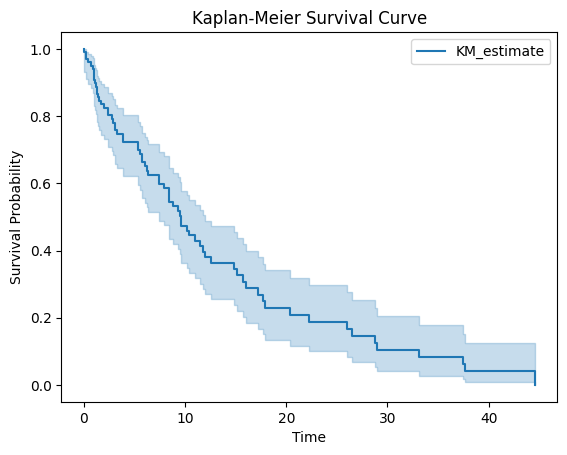

<lifelines.CoxPHFitter: fitted with 100 total observations, 31 right-censored observations>
             duration col = 'durations'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 69
   partial log-likelihood = -245.06
         time fit was run = 2024-08-29 09:58:38 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.02       1.02       0.01            -0.00             0.05                 1.00                 1.05

            cmp to    z    p   -log2(p)
covariate                              
age           0.00 1.75 0.08       3.63
---
Concordance = 0.55
Partial AIC = 492.12
log-likelihood ratio test = 3.02 on 1 df
-log2(p) of ll-ratio test = 3.61

In [3]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

# 예제 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'durations': np.random.exponential(scale=10, size=100),  # 생존 기간
    'event_observed': np.random.binomial(1, 0.7, size=100),  # 사건 발생 여부
    'age': np.random.normal(loc=50, scale=10, size=100)  # 공변량
})

# Kaplan-Meier 추정
kmf = KaplanMeierFitter()
kmf.fit(durations=data['durations'], event_observed=data['event_observed'])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

# Cox 비례 위험 모형
cph = CoxPHFitter()
cph.fit(data, duration_col='durations', event_col='event_observed')
cph.print_summary()